In [1]:
from fantasy.tools import read_sdss



Firstly, let us read spectrum. `Spectra` class has three methods: `read_sdss` , `read_gama_fits` and `read_txt`. `read_sdss` is designed to read SDSS spectra, while `read_text` ASCII files.

It is possible to read any format of spectra using any prefered method, and convert it to spectral class used in the FANTASY using `make_spec`...


In [2]:
from fantasy.models import automatic_path, FeII, create_model, create_tied_model, continuum, Line, create_fixed_model, create_input_folder

In [3]:
s=read_sdss('/home/yukawa/Downloads/J000338.94+160220.6_SDSS.fits')

In [4]:
s.DeRedden()

In [5]:
s.CorRed()

In [6]:
s.crop(4000, 7000)


For bulk spectra fitting, for automatic path of input files `use automatic_path(s)`


In [7]:
create_input_folder(xmin=4000,xmax=7000, path_to_folder='/home/yukawa/Downloads/fitting/')

Directory  /home/yukawa/Downloads/fitting/  already exists


`continuum()` calls `BrokenPowerlaw()` model with defining amplitude of the continuum from given spectra

In [8]:
cont=continuum(s,min_refer=4600, refer=4700)
out_OIII5007=Line('out_OIII50007', pos=5006.803341, fwhm=1500, max_offset=0, min_fwhm=1300, max_fwhm=6000)
broad=create_model(['hydrogen.csv', 'helium.csv'], prefix='br')
broad2=create_fixed_model(['hydrogen.csv'], name='broad2')

narrow=create_tied_model(['narrow_basic.csv', 'hydrogen.csv', 'helium.csv'],prefix='nr', min_offset=-3000, max_offset=3000, min_fwhm=100)
out=create_tied_model(['hydrogen.csv'], line=out_OIII5007, fix_oiii_ratio=True, prefix='out', min_fwhm=1300, max_fwhm=6000, max_offset=0)
fe=FeII()
fixed=create_fixed_model(['oiii_nii.csv','narrow_basic.csv', 'hydrogen.csv', 'helium.csv'], name='fixed', min_offset=0,max_offset=500, max_amplitude=4000, fwhm=500, min_fwhm=300, max_fwhm=600)

In [9]:
model =cont+narrow+broad+broad2+fe+out

In [10]:
model

<BinaryOpModel model instance '(((((brokenpowerlaw + (((((((((((((((((OIII5007 + nr_OIII4958) + nr_NII6584) + nr_NIII6548) + nr_[O III]_4363) + nr_[O I]_6300) + nr_[O I]_6363) + nr_[S II]_6716) + nr_[S II]_6730) + nr_Hd_4101) + nr_Hg_4340) + nr_Hb_4861) + nr_Ha_6562) + nr_HeI_4143) + nr_HeI_4471) + nr_HeII_4685) + nr_HeI_5877) + nr_HeI_6680)) + (((((((((0.0 + br_Hd_4102) + br_Hg_4340) + br_Hb_4861) + br_Ha_6563) + br_HeI_4144) + br_HeI_4471) + br_HeII_4686) + br_HeI_5877) + br_HeI_6680)) + broad2) + feii) + (((((((out_OIII50007 + out_OIII4958) + out_NII6584) + out_NIII6548) + out_Hd_4101) + out_Hg_4340) + out_Hb_4861) + out_Ha_6562))'>

In [11]:
s.fit(model)





stati 199230.7371867713


In [12]:
s.fit(model, ntrial=2)

stati 12.291276734119037
1 iter stat:  12.647830457721284
2 iter stat:  3.0346830734479227


In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)




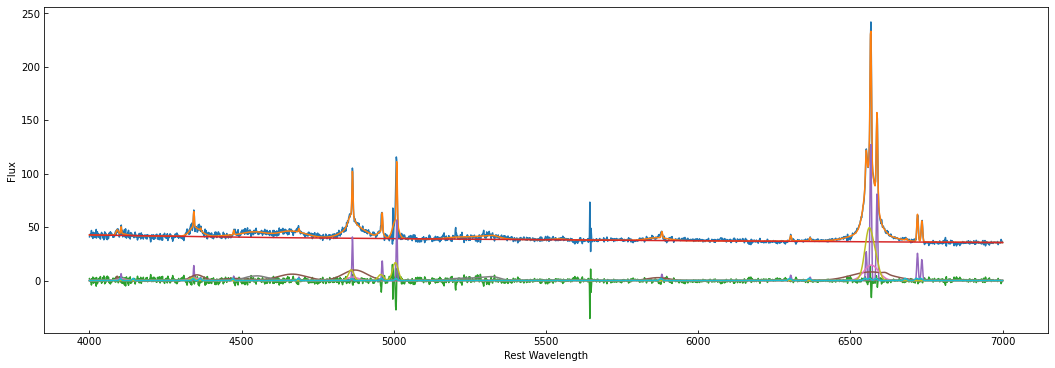

In [14]:
plt.style.context(['nature', 'notebook'])
plt.figure(figsize=(18,6))
plt.plot(s.wave, s.flux)
plt.plot(s.wave, model(s.wave))
plt.plot(s.wave, model(s.wave)-s.flux)

plt.plot(s.wave, cont(s.wave))
plt.plot(s.wave, narrow(s.wave))
plt.plot(s.wave, broad(s.wave))
plt.plot(s.wave, broad2(s.wave))
plt.plot(s.wave, fe(s.wave))
plt.plot(s.wave, out(s.wave))
plt.plot(s.wave, fixed(s.wave))
plt.xlabel('Rest Wavelength')
plt.ylabel('Flux')
plt.tick_params(which='both', direction="in")
#plt.plot(s.)
plt.savefig('/home/yukawa/slika.pdf')

In [15]:
model

<BinaryOpModel model instance '(((((brokenpowerlaw + (((((((((((((((((OIII5007 + nr_OIII4958) + nr_NII6584) + nr_NIII6548) + nr_[O III]_4363) + nr_[O I]_6300) + nr_[O I]_6363) + nr_[S II]_6716) + nr_[S II]_6730) + nr_Hd_4101) + nr_Hg_4340) + nr_Hb_4861) + nr_Ha_6562) + nr_HeI_4143) + nr_HeI_4471) + nr_HeII_4685) + nr_HeI_5877) + nr_HeI_6680)) + (((((((((0.0 + br_Hd_4102) + br_Hg_4340) + br_Hb_4861) + br_Ha_6563) + br_HeI_4144) + br_HeI_4471) + br_HeII_4686) + br_HeI_5877) + br_HeI_6680)) + broad2) + feii) + (((((((out_OIII50007 + out_OIII4958) + out_NII6584) + out_NIII6548) + out_Hd_4101) + out_Hg_4340) + out_Hb_4861) + out_Ha_6562))'>

In [16]:
s.gres.parnames

('brokenpowerlaw.refer',
 'brokenpowerlaw.ampl',
 'brokenpowerlaw.index1',
 'brokenpowerlaw.index2',
 'OIII5007.ampl',
 'OIII5007.offs_kms',
 'OIII5007.fwhm',
 'nr_NII6584.ampl',
 'nr_[O III]_4363.ampl',
 'nr_[O I]_6300.ampl',
 'nr_[O I]_6363.ampl',
 'nr_[S II]_6716.ampl',
 'nr_[S II]_6730.ampl',
 'nr_Hd_4101.ampl',
 'nr_Hg_4340.ampl',
 'nr_Hb_4861.ampl',
 'nr_Ha_6562.ampl',
 'nr_HeI_4143.ampl',
 'nr_HeI_4471.ampl',
 'nr_HeII_4685.ampl',
 'nr_HeI_5877.ampl',
 'nr_HeI_6680.ampl',
 'br_Hd_4102.ampl',
 'br_Hd_4102.offs_kms',
 'br_Hd_4102.fwhm',
 'br_Hg_4340.ampl',
 'br_Hg_4340.offs_kms',
 'br_Hg_4340.fwhm',
 'br_Hb_4861.ampl',
 'br_Hb_4861.offs_kms',
 'br_Hb_4861.fwhm',
 'br_Ha_6563.ampl',
 'br_Ha_6563.offs_kms',
 'br_Ha_6563.fwhm',
 'br_HeI_4144.ampl',
 'br_HeI_4144.offs_kms',
 'br_HeI_4144.fwhm',
 'br_HeI_4471.ampl',
 'br_HeI_4471.offs_kms',
 'br_HeI_4471.fwhm',
 'br_HeII_4686.ampl',
 'br_HeII_4686.offs_kms',
 'br_HeII_4686.fwhm',
 'br_HeI_5877.ampl',
 'br_HeI_5877.offs_kms',
 'br_HeI_5

In [18]:
s.save_json()